Assignment 2


T.Jayabawan


190250A

Question1)

<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

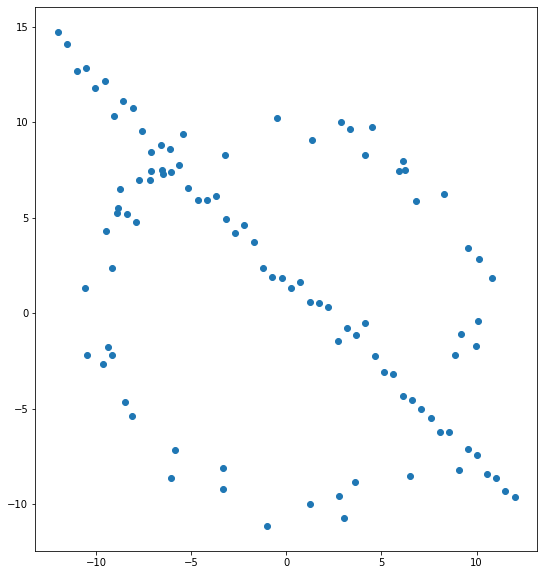

In [46]:
import numpy as np
from scipy . optimize import minimize
from scipy import linalg
import matplotlib.pyplot as plt
#np.random.seed(0)
N = 100
half_n = N//2
r = 10
s = r/16
t = np.random.uniform(0, 2*np.pi, half_n)
n = s*np.random.randn(half_n)
x, y = (r + n)*np.cos(t), (r + n)*np.sin(t)
X_circ = np.hstack((x.reshape( half_n, 1), y.reshape(half_n, 1)))

m, b = -1, 2
x = np.linspace (-12, 12 , half_n)
y = m*x + b + s*np.random.randn(half_n)
X_line = np.hstack((x.reshape(half_n, 1 ), y.reshape(half_n, 1 )))

X = np.vstack((X_circ, X_line))

a = X[:,0] 
b = X[:,1] 

plt.figure(figsize=(9, 10))
plt.plot(a, b, 'o')
plt.plot

In [47]:
def findCircle(pnt_1, pnt_2, pnt_3):
    x_1, y_1 = pnt_1[0], pnt_1[1]
    x_2, y_2 = pnt_2[0], pnt_2[1]
    x_3, y_3 = pnt_3[0], pnt_3[1]

    a_1 = x_1 - x_2
    a_2 = x_1 - x_3

    b_1 = y_1 - y_2
    b_2 = y_1 - y_3

    c_1 = (x_2**2 - x_1**2 + y_2**2 - y_1**2)/2
    c_2 = (x_3**2 - x_1**2 + y_3**2 - y_1**2)/2

    A = np.array([[a_1, b_1], [a_2, b_2]], dtype=np.float32)
    C = np.array([[c_1], [c_2]], dtype=np.float32)

    G_F = np.linalg.pinv(A) @ C
    G = -G_F[0][0]
    F = -G_F[1][0]
    C = -(x_1**2 + y_1**2  + 2*G*x_1 + 2*F*y_1)
    R_POW_2 = G**2 + F**2 - C

    if (R_POW_2 > 0):
        r_1 = np.sqrt((x_1-G)**2 + (y_1-G)**2)
        r_2 = np.sqrt((x_2-G)**2 + (y_2-F)**2)
        r_3 = np.sqrt((x_3-G)**2 + (y_3-F)**2)
        R = np.mean([r_1, r_2, r_3])
        return (G, F, R)
    else:
        return None



In [48]:
def RANSAC(Set, A, B, R, T):
    in_TH = R - T 
    out_TH = R + T 
    INL_ARR=[]
    INL_CT = 0
    ERROR = 0

    for p_t in Set:
        x, y = p_t[0], p_t[1]     
        r_cal = np.sqrt((x-A)**2 + (y-B)**2)   
        if (in_TH < r_cal < out_TH) & (5 < R < 15):  
            INL_CT += 1
            ERROR += np.abs(r_cal - R)
            INL_ARR.append(p_t)

    return INL_CT,INL_ARR,ERROR

In [49]:
N1 = 35
N2 = 10 
T = 1   
D1 = 30  
D2 = 40

ran_cand = []
ran_inl = []

max_cou = 0 
Best_Fit_Circle = [0, 0, 0]


for i in range(N1):
    ind = np.random.choice(X.shape[0], 3, replace=False) 
    Ran_pts = X[ind]
    A, B, R = findCircle(Ran_pts[0], Ran_pts[1], Ran_pts[2])

    inl_cou, inl_arr, mean_err = RANSAC(X,A, B, R, T)

    
    if (inl_cou >= max_cou) & (inl_cou > D1):
        max_cou = inl_cou
        best_fit_circle = [A, B, R]
        best_pts = Ran_pts

    if inl_cou > D1:
        for j in range(N2):
            inl_arr = np.array(inl_arr)
            ind_1 = np.random.choice(inl_arr.shape[0], 3, replace=False)
            Ran_pts_1 = inl_arr[ind_1]
            a_1, b_1, r_1 = findCircle(Ran_pts_1[0], Ran_pts_1[1], Ran_pts_1[2])

            inlier_count_1, inl_arr_1, mean_err_1 = RANSAC(X, a_1, b_1, r_1, T)

            if inlier_count_1 > D2:
                ran_cand.append([a_1, b_1, r_1, inlier_count_1, mean_err_1/inlier_count_1])
                ran_inl.append(inl_arr_1)
    


print(len(ran_cand))

for data in ran_cand:
    print(data)

9
[-0.35436118, -0.55865073, 10.10759838239679, 47, 0.49394790500320174]
[-0.2606336, 0.080898285, 10.385085894720843, 45, 0.4239234621101102]
[-0.21168223, -0.95854366, 10.007519743008968, 42, 0.5365629674568856]
[0.37773454, 0.15300763, 9.645300847291876, 45, 0.46947702080929615]
[0.54653436, 0.6774041, 10.242078507777762, 44, 0.44883007425119686]
[-0.1093667, 0.37139815, 10.171246272249709, 49, 0.4263882545510728]
[-0.34600756, 0.75774235, 9.920359998333723, 44, 0.425125247666338]
[-0.5693151, 0.19206703, 9.684218840204027, 46, 0.45963802064061793]
[-0.26715553, 0.44969168, 9.641902962201554, 49, 0.46014386927249046]


In [50]:
S = len(ran_cand)
max_cou = 0
min_err = 100000
rns_index = 0

for n in range(S):
    circ = ran_cand[n]
    if circ[3] > max_cou:
        max_cou = circ[3]
        min_err = circ[4]
        rns_index = n
    if (circ[3] == max_cou) & (circ[4]<min_err):
        max_cou = circ[3]
        min_err = circ[4]
        rns_index = n
        
circ_RNS = ran_cand[rns_index]

print(circ_RNS)
print(len(ran_inl[rns_index]))

[-0.1093667, 0.37139815, 10.171246272249709, 49, 0.4263882545510728]
49


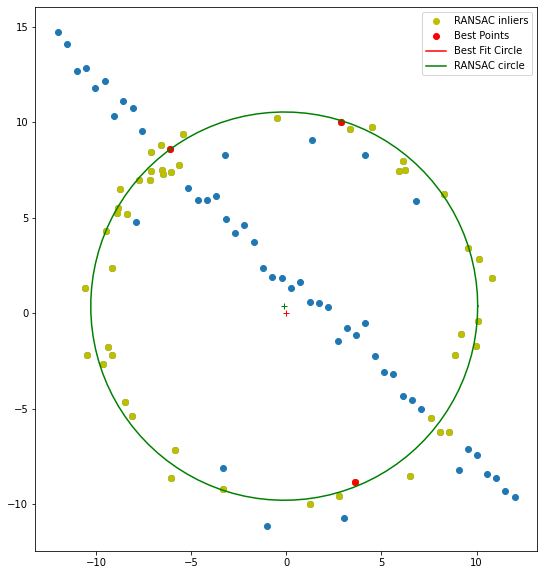

In [51]:
x_0, y_0, r_0 = Best_Fit_Circle[0], Best_Fit_Circle[1], Best_Fit_Circle[2]

x_RNS, y_RNS, r_RNS = circ_RNS[0], circ_RNS[1], circ_RNS[2]

plt.figure(figsize=(9, 10))

a = X[:,0]
b = X[:,1] 
plt.plot(a, b, 'o')

inliers = np.array(ran_inl[rns_index])
inlier_x = inliers[:,0]
inliers_y = inliers[:,1]
plt.plot(inlier_x, inliers_y, 'o', color='y', label= 'RANSAC inliers')

best_x = best_pts[:,0]
best_y = best_pts[:,1]
plt.plot(best_x, best_y, 'o', color='r', label= 'Best Points')

theta = np.linspace( 0 , 2 * np.pi , 100 )
p = x_0 + r_0 * np.cos( theta )
q = y_0 + r_0 * np.sin( theta)
plt.plot(p, q, color='r', label='Best Fit Circle')


p = x_RNS + r_RNS * np.cos( theta )
q = y_RNS + r_RNS * np.sin( theta)
plt.plot(p, q, color='g', label='RANSAC circle')


plt.plot(x_0, y_0, '+', color='r')

plt.plot(x_RNS, y_RNS, '+', color='g')

plt.legend()

plt.show()